In [1]:
# Plot scripts for Figure 1D-G

In [2]:
library(ggsci)
library(scales)
library(ggplot2)
library(dplyr)
library(viridis)
library(tidyverse)
library(reshape2)
# library(patchwork)
library(stringr)
# library(ggsignif)
library(ggrepel)

source('./common_amplicon_statistics.r')
# Load the UpSetR library
# library(UpSetR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from

In [3]:
shannon = function (freq) {
    sum_freq = sum(freq)
    shan = 0
    for (i in freq) {
        index = -(i/sum_freq)*log2(i/sum_freq)
        shan = shan+index
    }
    return(shan)
}

In [4]:
#should develop further for function to analyze multiple samples
OD2 = read.csv('../data/ESCbulk_amplicon/mESC_4OHT_D2_umi_table.csv')
# OD4 uploaded to GEO database
# OD4 = read.csv('../data/ESCbulk_amplicon/mESC_4OHT_D4_umi_table.csv')  
# downsample OD4 reads in paper
OD4 = read.csv('../data/ESCbulk_amplicon/mESC_4OHT_D4_ds_umi_table.csv') 
OD6 = read.csv('../data/ESCbulk_amplicon/mESC_4OHT_D6_umi_table.csv')
OD8 = read.csv('../data/ESCbulk_amplicon/mESC_4OHT_D8_umi_table.csv')
doxD2 = read.csv('../data/ESCbulk_amplicon/mESC_dox_D2_umi_table.csv')
doxD4 = read.csv('../data/ESCbulk_amplicon/mESC_dox_D4_umi_table.csv')
doxD6 = read.csv('../data/ESCbulk_amplicon/mESC_dox_D6_umi_table.csv')
doxD8 = read.csv('../data/ESCbulk_amplicon/mESC_dox_D8_umi_table.csv')

In [5]:
OD2 = OD2[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
OD4 = OD4[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
OD6 = OD6[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
OD8 = OD8[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
doxD2 = doxD2[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
doxD4= doxD4[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
doxD6 = doxD6[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]
doxD8 = doxD8[, c("readCount", "CIGAR","r1", "r2", "r3", "r4", "intBC")]

# check intersite deletion percentage using bulk ESC samples

In [6]:
#preparing for calculate allele fraction of intersite deletion type
bulk_samples = rbind(OD2, OD4, OD6, OD8, doxD2, doxD4, doxD6, doxD8)
bulk_samples$X = 1:nrow(bulk_samples)
bulk_samples = bulk_samples %>% dplyr::select(X, r1, r2, r3, r4, readCount)

In [7]:
head(bulk_samples)

,X,r1,r2,r3,r4,readCount
,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[None]ACTCA,CATTT[None]TTCGG,1867
2,2,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[183:8D]GTGGC,CATTT[None]TTCGG,1075
3,3,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[None]ACTCA,CATTT[None]TTCGG,969
4,4,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[None]ACTCA,CATTT[None]TTCGG,962
5,5,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[None]ACTCA,CATTT[None]TTCGG,886
6,6,GCTTA[None]TGAGT,GCCGA[None]CGGTT,CTCGT[None]ACTCA,CATTT[None]TTCGG,839


## Figure 1G intersite fraction

In [8]:
bulk_indel_allele_fraction =intersite_deletion_fraction(bulk_samples)
head(bulk_indel_allele_fraction)

,state,ratio,type
,<fct>,<dbl>,<fct>
1,T1,25.9787500,Intrasite
2,T2,37.5479407,Intrasite
3,T3,34.5481925,Intrasite
4,T4,12.7742769,Intrasite
5,T1-2,0.5294504,Inter-2-sites
6,T2-3,1.7951900,Inter-2-sites


In [9]:
inter_del_frac_colors = setNames(c('#00A087FF', '#4DBBD5FF', '#E64B35FF','#E64B35FF'), 
                                 c("Intrasite", "Inter-2-sites", "Inter-3-sites", "Inter-4-sites"))
plot_colors = inter_del_frac_colors[unique(bulk_indel_allele_fraction$type)]

In [10]:
plot_colors

Intrasite Inter-2-sites Inter-3-sites Inter-4-sites 
  "#00A087FF"   "#4DBBD5FF"   "#E64B35FF"   "#E64B35FF"

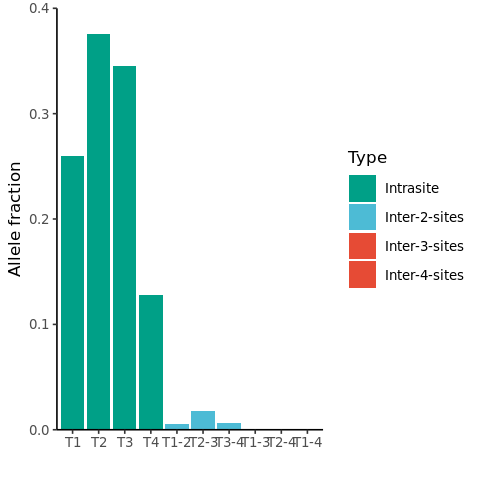

In [11]:
#plot the inter-site deletions
options(repr.plot.width=4, repr.plot.height=4)
#sc293T10clones
ggplot(bulk_indel_allele_fraction, aes(x=state, y=ratio/100, fill=type))+geom_bar(position='dodge',stat='identity')+
    scale_fill_manual(values =plot_colors)+    
    scale_y_continuous(expand=c(0,0), limits=c(0,0.40), breaks = c(0, 0.10, 0.20, 0.30, 0.40))+
    xlab("")+ylab("Allele fraction")+guides(fill=guide_legend(title='Type'))+
    theme_classic(base_size=10)
ggsave('../results/Fig1_ESCbulk_intersite_deletion_fraction.pdf', width=4, height=4)

## Figure 1F UMI fraction

In [12]:

#generate UMI barcode fraction for different types of mutation
#deal with each target site individually
process_row_r1 <- function(i, umi_table) {
  r1 = unlist(umi_table$r1[i])
  r2 = unlist(umi_table$r2[i])
  r3 = unlist(umi_table$r3[i])
  r4 = unlist(umi_table$r4[i])
  
  if (length(r1)==1 && r1[1]=='None') {
    return('Unedited')
  } else if (length(r1)==1 && any(grepl('D', r1)) && !(r1[1] %in% c(r2,r3,r4))) {
    return('Intrasite_deletion') #whether r1 mutation event is in r2/r3/r4
  } else if (length(r1)==1 && any(grepl('D', r1)) && (r1[1] %in% c(r2,r3,r4))) {
    return('Intersite_deletion')
  } else if (length(r1)>1 && (r1[length(r1)] %in% c(r2,r3,r4))) {
    return('Intersite_indel')
  } else if (length(r1)>1 && !(r1[length(r1)] %in% c(r2,r3,r4))) {
    return('Intrasite_indel')
  } else if (length(r1)==1 && any(grepl('I', r1))) {
    return('Insertion')
  } else {
    return(umi_table$r1_mut_type[i])
  }
}

process_row_r2 <- function(i, umi_table) {
  r1 = unlist(umi_table$r1[i])
  r2 = unlist(umi_table$r2[i])
  r3 = unlist(umi_table$r3[i])
  r4 = unlist(umi_table$r4[i])

 if (length(r2)==1 && r2[1]=='None') {
    return('Unedited')
  } else if (length(r2)==1 && any(grepl('D', r2)) && !(r2[1] %in% c(r1,r3,r4))) {
    return('Intrasite_deletion') 
  } else if (length(r2)==1 && any(grepl('D', r2)) && (r2[1] %in% c(r1,r3,r4))) {
    return('Intersite_deletion')
  } else if (length(r2)>1 && (r2[length(r2)] %in% c(r1,r3,r4))) {
    return('Intersite_indel')
  } else if (length(r2)>1 && !(r2[length(r2)] %in% c(r1,r3,r4))) {
    return('Intrasite_indel')
  } else if (length(r2)==1 && any(grepl('I', r2))) {
    return('Insertion')
  } else {
    return(umi_table$r2_mut_type[i])
  }
}

process_row_r3 <- function(i, umi_table) {
  r1 = unlist(umi_table$r1[i])
  r2 = unlist(umi_table$r2[i])
  r3 = unlist(umi_table$r3[i])
  r4 = unlist(umi_table$r4[i])
  
  if (length(r3)==1 && r3[1]=='None') {
    return('Unedited')
  } else if (length(r3)==1 && any(grepl('D', r3)) && !(r3[1] %in% c(r1,r2,r4))) {
    return('Intrasite_deletion')
  } else if (length(r3)==1 && any(grepl('D', r3)) && (r3[1] %in% c(r1,r2,r4))) {
    return('Intersite_deletion')
  } else if (length(r3)>1 && (r3[length(r3)] %in% c(r1,r2,r4))) {
    return('Intersite_indel')
  } else if (length(r3)>1 && !(r3[length(r3)] %in% c(r1,r2,r4))) {
    return('Intrasite_indel')
  } else if (length(r3)==1 && any(grepl('I', r3))) {
    return('Insertion')
  } else {
    return(umi_table$r3_mut_type[i])
  }
}

process_row_r4 <- function(i, umi_table) {
  r1 = unlist(umi_table$r1[i])
  r2 = unlist(umi_table$r2[i])
  r3 = unlist(umi_table$r3[i])
  r4 = unlist(umi_table$r4[i])
  
  if (length(r4)==1 && r4[1]=='None') {
    return('Unedited')
  } else if (length(r4)==1 && any(grepl('D', r4)) && !(r4[1] %in% c(r1, r2,r3))) {
    return('Intrasite_deletion')
  } else if (length(r4)==1 && any(grepl('D', r4)) && (r4[1] %in% c(r1,r2,r3))) {
    return('Intersite_deletion')
  } else if (length(r4)>1 && (r4[length(r4)] %in% c(r1,r2,r3))) {
    return('Intersite_indel')
  } else if (length(r4)>1 && !(r4[length(r4)] %in% c(r1,r2,r3))) {
    return('Intrasite_indel')
  } else if (length(r4)==1 && any(grepl('I', r4))) {
    return('Insertion')
  } else {
    return(umi_table$r4_mut_type[i])
  }
}

In [13]:
#DARLIN/CARLIN's way to define the mutation type
# for each target site, consider the last mutation events, and perform pairwise comparison to 
# check whether the early mutation events also appeared at target site afterwards
#if not [none] and 'NA', split the target site according to the number of brackets
# input: umi_table, a data.frame generated from Cassiopeia preprocessing
# output: a umi_fraction, a data.frame stores the umi Freq for each type of target site
mutation_readcount_fraction = function(umi_table) {
    
    # preprocessing
    umi_table = umi_table %>% select(r1, r2, r3, r4, readCount)


    umi_table$r1 = ifelse(umi_table$r1=='', 'unknown', umi_table$r1)
    umi_table$r2 = ifelse(umi_table$r2=='', 'unknown', umi_table$r2)
    umi_table$r3 = ifelse(umi_table$r3=='', 'unknown', umi_table$r3)
    umi_table$r4 = ifelse(umi_table$r4=='', 'unknown', umi_table$r4)
    
    #split mutation events within a target
    umi_table$r1 = sub('^\\[', '', umi_table$r1)
    umi_table$r2 = sub('^\\[', '', umi_table$r2)
    umi_table$r3 = sub('^\\[', '', umi_table$r3)
    umi_table$r4 = sub('^\\[', '', umi_table$r4)

    umi_table$r1 = sub('\\]$', '', umi_table$r1)
    umi_table$r2 = sub('\\]$', '', umi_table$r2)
    umi_table$r3 = sub('\\]$', '', umi_table$r3)
    umi_table$r4 = sub('\\]$', '', umi_table$r4)

    umi_table$r1 = strsplit(umi_table$r1, "\\]\\[")
    umi_table$r2 = strsplit(umi_table$r2, "\\]\\[")
    umi_table$r3 = strsplit(umi_table$r3, "\\]\\[")
    umi_table$r4 = strsplit(umi_table$r4, "\\]\\[")
    
    # assign mutation event information for each target
    # types = c('Unedited', 'Intrasite_deletion', 'Intersite_deletion', 'Intersite_indel', 'Intrasite_indel', 'Insertion')

    umi_table$r1_mut_type = 'unknown'
    umi_table$r2_mut_type = 'unknown'
    umi_table$r3_mut_type = 'unknown'
    umi_table$r4_mut_type = 'unknown'
    # for (type in types) {
    umi_table$r1_mut_type = sapply(1:nrow(umi_table), process_row_r1, umi_table=umi_table)
    umi_table$r2_mut_type = sapply(1:nrow(umi_table), process_row_r2, umi_table=umi_table)
    umi_table$r3_mut_type = sapply(1:nrow(umi_table), process_row_r3, umi_table=umi_table)
    umi_table$r4_mut_type = sapply(1:nrow(umi_table), process_row_r4, umi_table=umi_table)    
    # }

    # Jan 7th, 2024, This function only generate allele fraction instead of UMI fraction?
    # Use allele fraction instead of using the UMI fraction, as UMI fraction subject to many factors, such as cell cell numbers, allele fraction is less sensitive to cell number
    
    r1_umi_fraction = umi_table %>% group_by(r1_mut_type) %>% reframe(Freq = sum(readCount)) %>% rename(type=r1_mut_type) %>% 
      filter(type!='unknown')  %>% mutate(target = 'T1')
    r2_umi_fraction = umi_table %>% group_by(r2_mut_type) %>% reframe(Freq = sum(readCount)) %>% rename(type=r2_mut_type) %>% 
      filter(type!='unknown')  %>% mutate(target = 'T2')
    r3_umi_fraction = umi_table %>% group_by(r3_mut_type) %>% reframe(Freq = sum(readCount)) %>% rename(type=r3_mut_type) %>% 
      filter(type!='unknown')  %>% mutate(target = 'T3')
    r4_umi_fraction = umi_table %>% group_by(r4_mut_type) %>% reframe(Freq = sum(readCount)) %>% rename(type=r4_mut_type) %>% 
      filter(type!='unknown')  %>% mutate(target = 'T4')
    
    umi_fraction = rbind(r1_umi_fraction, r2_umi_fraction, r3_umi_fraction, r4_umi_fraction)
    umi_fraction$type = factor(umi_fraction$type, levels = c('Unedited', 'Intrasite_deletion', 'Intersite_deletion', 
    'Insertion','Intrasite_indel', 'Intersite_indel'))
    return(umi_fraction)
}

In [14]:
bulk_samples$r1 = gsub('[ATCG]', '', bulk_samples$r1)
bulk_samples$r2 = gsub('[ATCG]', '', bulk_samples$r2)
bulk_samples$r3 = gsub('[ATCG]', '', bulk_samples$r3)
bulk_samples$r4 = gsub('[ATCG]', '', bulk_samples$r4)
bulk_samples = bulk_samples %>% group_by(r1, r2, r3, r4) %>% reframe(readCount = sum(readCount))

#select readCount cutoff as 10 to remove strange mutation pattern
bulk_samples = bulk_samples %>% filter(readCount > 10) 

In [15]:
readCount_fraction = mutation_readcount_fraction(bulk_samples)
head(readCount_fraction)

type,Freq,target
<fct>,<int>,<chr>
Insertion,145450,T1
Intersite_deletion,689022,T1
Intersite_indel,17455,T1
Intrasite_deletion,17187644,T1
Intrasite_indel,1052889,T1
Unedited,45673153,T1


In [16]:
umi_fraction_colors = setNames(c('#0000fe', '#fe0000', '#81007f','#ff9899','#b366b4','#e6e6e6'), 
         c('Insertion', 'Intersite_deletion', 'Intersite_indel','Intrasite_deletion','Intrasite_indel','Unedited'))
umi_fraction_colors

Insertion Intersite_deletion    Intersite_indel Intrasite_deletion 
         "#0000fe"          "#fe0000"          "#81007f"          "#ff9899" 
   Intrasite_indel           Unedited 
         "#b366b4"          "#e6e6e6"

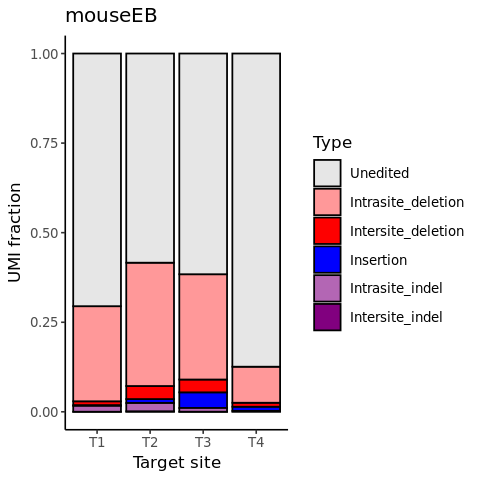

In [17]:
# mouseEB
options(repr.plot.width=4, repr.plot.height=4)
ggplot(readCount_fraction, aes(x = target, y = Freq, fill=type)) + 
    geom_bar(stat='identity',position = "fill", color='black')+
    scale_fill_manual(values = umi_fraction_colors)+ylab('UMI fraction')+
    xlab('Target site') + ggtitle('mouseEB')+guides(fill=guide_legend(title='Type'))+
    theme_classic(base_size=10)
ggsave('../results/Fig1_ESCbulk_mutation_type_readCount_fraction.pdf', width=4, height=4)

## Figure 1D mutation length

In [18]:
transform_allele = function(read_count_table) {
    read_count_table = read_count_table %>% 
    mutate(allele1 = paste(r1, r2, r3, r4, sep='_')) %>% 
    mutate(allele1 =  gsub('[ATCG]', '', allele1)) %>% 
    mutate(allele1 =  gsub('\\]', '', allele1)) %>% 
    mutate(allele1 =  gsub('\\[', '', allele1)) %>%
    select(intBC, allele1, readCount)
    return(read_count_table)
}

In [19]:
OD2  = transform_allele(OD2) 
OD4  = transform_allele(OD4)
OD6  = transform_allele(OD6)
OD8  = transform_allele(OD8)

doxD2  = transform_allele(doxD2)
doxD4  = transform_allele(doxD4)
doxD6  = transform_allele(doxD6)
doxD8  = transform_allele(doxD8)

In [20]:
OD2  = OD2 %>% filter(readCount > 2)
OD4  = OD4 %>% filter(readCount > 2)
OD6  = OD6 %>% filter(readCount > 2)
OD8  = OD8 %>% filter(readCount > 2)

doxD2  = doxD2 %>% filter(readCount > 2)
doxD4  = doxD4 %>% filter(readCount > 2)
doxD6  = doxD6 %>% filter(readCount > 2)
doxD8  = doxD8 %>% filter(readCount > 2)

In [21]:
readCount_table = rbind(OD2, OD4, OD6, OD8, doxD2, doxD4, doxD6, doxD8)
readCount_table = readCount_table %>% group_by(intBC, allele1) %>% reframe(readCount = sum(readCount))

In [22]:
head(readCount_table)

intBC,allele1,readCount
<chr>,<chr>,<int>
AACAATCCTAGTCG,85:74D_85:74D_181:6D_225:11D,3
AACACAAAGTGTGG,None_151:4D_None_None,78
AACACAGTACGGCG,77:31D_138:17D_181:6D_None,23
AACACCGGTGAAGG,77:31D_138:17D_184:1I_None,66
AACATGCGTGGCCA,None_145:13D_181:6D_None,78
AACCACGTATTACG,82:78D_82:78D_None_None,4


In [23]:
n_distinct(readCount_table$allele1)

[1] 62592

In [24]:
#input: character, a single CIGAR value
#output: data.frame, three columns, mutation start site, mutation end site, mutation type
parse_cigar_bulk_duTracer = function(allele1) {
    sites <- strsplit(allele1, "_")[[1]]
    results <- list()
    for (site in sites) {
        if (site!='None') {
            seps = strsplit(site, ':')[[1]]
            start = as.numeric(seps[1])
            length <- as.numeric(gsub('\\D', '', seps[2]))
            type <- gsub('\\d', '', seps[2])
            results[[length(results) + 1]] <- list(start = start, end = start + length, type = type)
        }
    }
    
    results = do.call(rbind, lapply(results, data.frame, stringsAsFactors=FALSE))
    results = unique(results)
    return(results)
}

In [25]:
#input: read_count_table, data.frame, read.csv without specifying function row.names=1
#input: top numeric, most common indels, top=0 means no selection
#input: df_ref dataframe, ref-sequence annotation
#output: data.frame, with 7 columns: start	end	type	n_reads	fraction	log10fraction	linewidth
umi_table_to_df_mut = function(umi_table, df_ref, top=200) {
    nUMI = sum(umi_table$readCount)
    cigar_umi = umi_table %>% group_by(allele1) %>% summarise(n_umi = sum(readCount)) %>% arrange(desc(n_umi)) 
    # Test the function
    parse_results = data.frame(start=double(), end=double(), type=character(), n_umi=double())
    for (i in 1:nrow(cigar_umi)) {
        cigar = cigar_umi$allele1[i]
        if (grepl('[ID]', cigar)) {
            result = parse_cigar_bulk_duTracer(cigar)

            result$n_umi = cigar_umi$n_umi[i]
            parse_results = rbind(parse_results, result)
            }
    }

    cigar_pattern = parse_results %>% group_by(start, end, type) %>% reframe(n_umi = sum(n_umi)) %>% 
       arrange(desc(n_umi)) %>% mutate(fraction = n_umi/nUMI) 

    #only check the top 200 mutations or all mutations?    
    df_mut = cigar_pattern %>% filter(start>=df_ref$start[1] & end<df_ref$end[nrow(df_ref)]) 
    if (top > 0) {
        df_mut = head(df_mut, top) }
    df_mut$log10fraction = log10(df_mut$fraction)
    df_mut$linewidth = -3/(log10(df_mut$fraction)) #3 was selected randomly accordint to the linewidth
    
    #some linewidth is extremely large, single only a few mutations occurs in that intBCs, need to constrain its linewidth
    df_mut$linewidth = ifelse(df_mut$linewidth>10, 10, df_mut$linewidth) #nearly 50%
    
    # df_mut = df_mut %>% filter(start>=df_ref$start[1]) #some mutation are outside of flanking region
    return(df_mut)
}

In [26]:
#create cassette location map
df_ref = read.csv('../data/ESCbulk_amplicon/dutracer_target_loci.csv')
df_ref = df_ref %>% filter(!(region %in% c('primerF', 'intBC', 'flanking')))
# df_ref$start[1] = 51
df_ref

region,start,end
<chr>,<dbl>,<dbl>
prefix,60.0,72.0
T1,73.0,99.0
PAM,73.0,75.0
cut,95.5,96.5
linker,100.0,126.0
T2,127.0,153.0
PAM,127.0,129.0
cut,149.5,150.5
linker,154.0,176.0


In [27]:
# check indel length distribution
df_mut = umi_table_to_df_mut(umi_table = readCount_table, df_ref = df_ref, top=0)
head(df_mut)

Warning message in parse_cigar_bulk_duTracer(cigar):
“NAs introduced by coercion”


start,end,type,n_umi,fraction,log10fraction,linewidth
<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
181,187,D,8031115,0.15574256,-0.8075927,3.714744
145,158,D,2102307,0.04076877,-1.3896724,2.158782
150,153,D,2064842,0.04004223,-1.3974817,2.146719
184,185,I,1523738,0.02954893,-1.5294582,1.961479
138,155,D,1364151,0.02645416,-1.5775061,1.901736
77,108,D,1295509,0.02512302,-1.5999281,1.875084


In [28]:
head(df_mut)

start,end,type,n_umi,fraction,log10fraction,linewidth
<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
181,187,D,8031115,0.15574256,-0.8075927,3.714744
145,158,D,2102307,0.04076877,-1.3896724,2.158782
150,153,D,2064842,0.04004223,-1.3974817,2.146719
184,185,I,1523738,0.02954893,-1.5294582,1.961479
138,155,D,1364151,0.02645416,-1.5775061,1.901736
77,108,D,1295509,0.02512302,-1.5999281,1.875084


In [29]:
mutation_length_distribution = df_mut %>% mutate(mutation_length = end-start+1) %>% select(type, mutation_length, fraction)
# Modify the fraction to be negative for 'D' type
mutation_length_distribution$fraction[mutation_length_distribution$type == "D"] <- -mutation_length_distribution$fraction[mutation_length_distribution$type == "D"]
head(mutation_length_distribution)

type,mutation_length,fraction
<chr>,<dbl>,<dbl>
D,7,-0.15574256
D,14,-0.04076877
D,4,-0.04004223
I,2,0.02954893
D,18,-0.02645416
D,32,-0.02512302


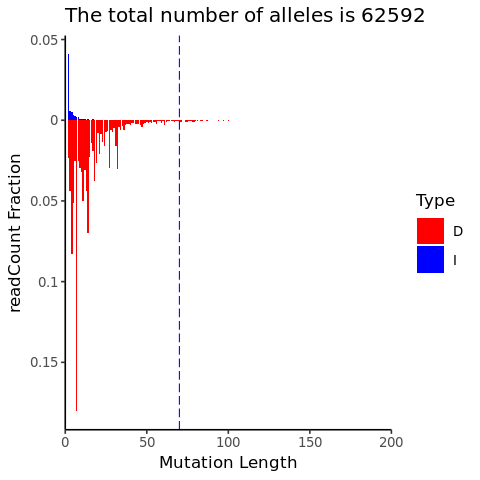

In [30]:
# Create the barplot
options(repr.plot.width=4, repr.plot.height=4)
# allele_number = n_distinct(original_umi_table$CIGAR)
ggplot(mutation_length_distribution, aes(x = mutation_length, y = fraction, fill = type)) +
  geom_bar(stat = "identity") + scale_fill_manual(values = c("#fe0000", "#0000fe"))+
  scale_y_continuous(labels = abs) +  # Display y-axis labels as absolute values
  scale_x_continuous(expand=c(0,0), limits=c(0, 200))+
  labs(x = "Mutation Length", y = "readCount Fraction", fill = "Type") +
  geom_vline(aes(xintercept = 70), linetype = "longdash", color = "blue", linewidth = 0.3)+
  # annotate("text", label = "loss information \n intersite deletion", x = 70, y = 0.1)+
  ggtitle(paste0('The total number of alleles is ', n_distinct(readCount_table$allele1)))+
  theme_classic(base_size=10)
ggsave('../results/Fig1_ESCbulk_mutation_length_distribution.pdf', width=4, height=4)

In [34]:
colors

prefix        T1       PAM       cut    linker        T2        T3        T4 
"#808080" "#b47c53" "#15202b" "#e64b35" "#e5e5e9" "#b47c53" "#fff205" "#fff205" 
  postfix 
"#808080"

## Figure 1E circos plot

In [35]:
# DuTracer color scheme
# colors = c('#808080', '#b47c53', '#15202b', '#e64b35', '#e5e5e9', '#b47c53', '#fff205','#fff205','#808080')
# T1/T2 #98c734   T3 T4#d9bf4e
colors = c('#808080', '#98c734', '#15202b', '#e64b35', '#e5e5e9', '#98c734', '#d9bf4e','#d9bf4e','#808080')
colors = setNames(colors, unique(df_ref$region))

mutation_circos_plot = function(df_ref, df_mut) {
    library(circlize)
    library(ComplexHeatmap)
    total_rects = nrow(df_ref)

    # Define the genomic information for the circos plot
    circos.clear()
    circos.par(start.degree = 90)
    # circos.par(gap.degree = 0.5, cell.padding = c(0.02, 0.02, 0.02, 0.02))

    circos.initialize('backbone', xlim = c(df_ref$start[1],df_ref$end[total_rects]))

    circos.track(ylim = c(0, 1), 
                 # bg.col = col,
        bg.col = c('white'), 
        bg.border = NA, track.height = 0.2)

    #plot the regions
    for (i in 1: (total_rects-1)) {
        circos.rect(xleft=df_ref$start[i], ybottom=0, xright=df_ref$end[i], ytop=1,  col=colors[df_ref$region[i]])
    }

    #show the direction of fragments
    circos.arrow(
        x1=df_ref$start[total_rects],
        x2=df_ref$end[total_rects],
        y=get.cell.meta.data("ycenter"),
        width = get.cell.meta.data("yrange"),
        arrow.head.length = mm_x(10),
        arrow.head.width = get.cell.meta.data("yrange")*1.2,
        col='#808080'
        )

    #add labels
    for (i in 1: total_rects) {
        circos.text(x=(df_ref$start[i]+df_ref$end[i])/2, y=0.5, df_ref$region[i]) #adjust the font size
    }

    # Add the links for each mutation
    for (i in 1:nrow(df_mut)) {
        circos.link('backbone',
                    df_mut$start[i], 
                    'backbone', 
                    df_mut$end[i], 
                    col = ifelse(df_mut$type[i] == "D", "#fe0000", "#0000fe"), #deletion or insertions
                    lwd = df_mut$linewidth[i]) #linewidth according to frequency

    }

    #add legends
    draw(Legend(at = c('Deletion', 'Insertion'), type='points', legend_gp=gpar(col=c("#fe0000", "#0000fe")),
        title_position = "topleft", title = "Links"), 
         # x = unit(1, "npc") - unit(3, "mm"), y = unit(8, "mm"),
         x = unit(0.95, "npc"), y = unit(0.05, "npc"),
         just=c('right', 'bottom'))

    draw(Legend(at=(-2), type='lines', legend_gp=gpar(col='#81007f', lwd=1.5), title_position='topleft', title='log10 UMI\n Fraction'), 
        # x = unit(6, "mm"), y = unit(8, "mm"),
         x = unit(0.05, "npc"), y = unit(0.05, "npc"),
        just=c('left', 'bottom'))

    # add a title for the plot to specify the number of mutations
    n = nrow(df_mut)
    title(paste0('Total number of mutation types is ', n))
    circos.clear() }


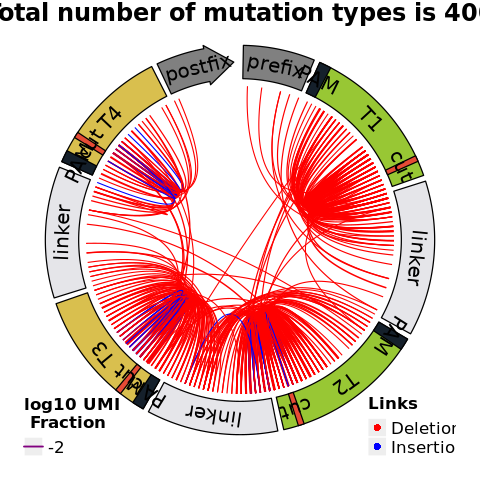

In [36]:
mutation_circos_plot(df_ref, df_mut[1:400,])

In [37]:
pdf('../results/Fig1_ESCbulk_mutation_circos_plot.pdf', width=6, height=6)
mutation_circos_plot(df_ref, df_mut[1:200,])
dev.off()

png 
  2